<h2 style='color:blue' align="center">Logistic Regression on load_digit dataset: Multiclass Classification</h2>

## Problem Statement 

Use sklearn.datasets, load_digits dataset to train the model using logistic regression. Figure out accuracy 
of your model and use that to predict different samples in your test dataset. 

In [4]:
#importing the dataset and libraries

from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 432x288 with 0 Axes>

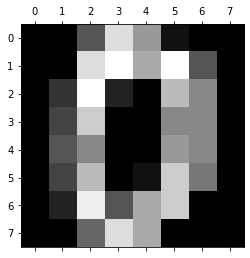

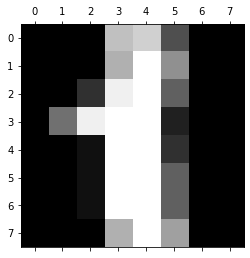

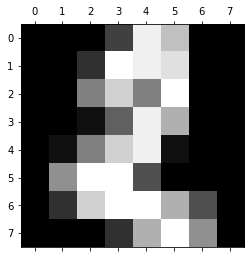

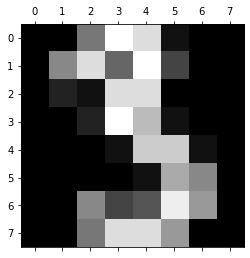

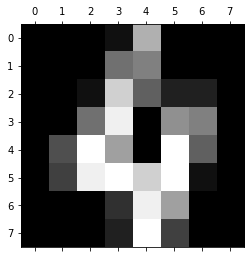

In [5]:
#viewing the image column

plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

<h4 style='color:purple'>Understanding the dataset</h4>

In [ ]:
# to return all properties of the dataset

dir(digits)

In [11]:
import pandas as pd
df = pd.DataFrame([digits])
df.data

0    [[0.0, 0.0, 5.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0...
Name: data, dtype: object

In [4]:
digits.data[26]

array([ 0.,  0.,  1., 13., 14.,  3.,  0.,  0.,  0.,  0.,  8., 16., 13.,
        2.,  0.,  0.,  0.,  2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  3.,
       16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  5.,  0.,  0.,
        0.,  0.,  3., 16., 16., 16., 16.,  6.,  0.,  0.,  1., 14., 16.,
       16., 16., 12.,  0.,  0.,  0.,  3., 12., 15., 14.,  7.,  0.])

In [5]:
digits.feature_names[26]

'pixel_3_2'

In [6]:
digits.target[26]

6

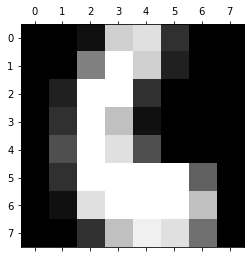

In [7]:
plt.matshow(digits.images[26]) 

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [8]:
#creating an object for logistic regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
# importing train_test split

from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [11]:
#training the model

model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [12]:
model.score(X_test, y_test)

0.9694444444444444

In [13]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [14]:
y_predicted = model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[38,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  2],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 30]])

Text(69.0, 0.5, 'Truth')

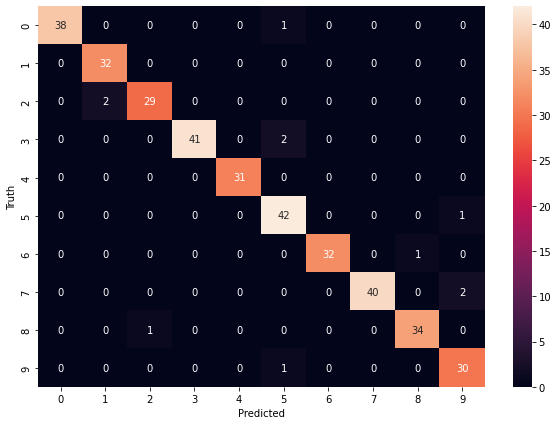

In [16]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')